# Глубинное обучение 1 / Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 1. Часть 2: полносвязные нейронные сети. 

### Общая информация

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{\text{penalty}} = M_{\text{full}} \cdot 0.85^{t/1440}$, где $M_{\text{full}}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать через четыре дня после мягкого дедлайна, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этой части мы будем использовать фреймворк для обучения нейронный сетей, который вы реализовали в первой половине задания. А именно, вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html). Если по какой-то причине вы не сделали первую половину домашки, то **можете поставить все эксперименты на PyTorch**, но рекомендуется использовать ваши реализации модулей. 

In [1]:
import modules as mm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from IPython.display import clear_output

plt.rcParams.update({'font.size': 16})
sns.set_style('whitegrid')
np.random.seed(0xFA1AFE1)

Начнем с того, что скачаем и загрузим данные:

In [2]:
# !wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

In [3]:
df = pd.read_csv('data.txt.zip', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


Посмотрим на статистики по данным.

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

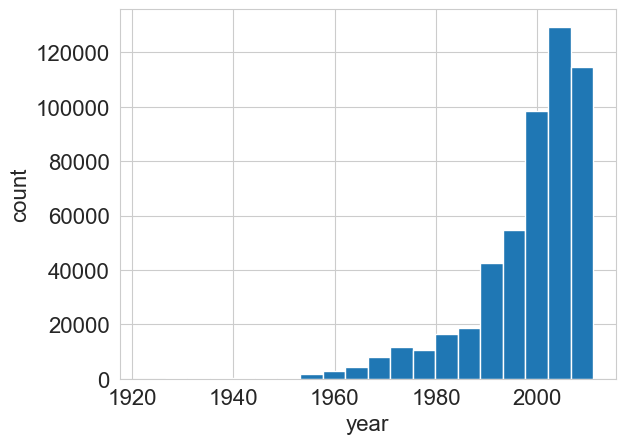

Range: 1922 - 2011
Unique values: 89


In [5]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()
print(f'Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}')
print(f'Unique values: {np.unique(df.iloc[:, 0]).size}')

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [6]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

**Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов).** Мы будем использовать MSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого бучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [7]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

rr = Ridge()
rr.fit(X_train, y_train)

Ridge()

In [243]:
print(f'Ridge Regression Test Score: {mean_squared_error(y_test, rr.predict(X_test))}')
print(f'Ridge Regression Val Score: {mean_squared_error(y_val, rr.predict(X_val))}', '\n')

print(f'Best constant Test Score: {mean_squared_error(y_test, np.full(y_test.shape, y_test.mean()))}')
print(f'Best constant Val Score: {mean_squared_error(y_val, np.full(y_val.shape, y_val.mean()))}', '\n')

Ridge Regression Test Score: 89.74966397222076
Ridge Regression Val Score: 92.05297598246568 

Best constant Test Score: 117.6182574102307
Best constant Val Score: 120.83724092628493 



Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию:

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xE2E4)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Глава I. Заводим нейронную сеть (5 баллов)

**Задание 1.1 (0.5 баллов).** Заполните пропуски в функции `train_and_validate`. Она поможет нам запускать эксперименты.

In [172]:
def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    '''
    Plot losses and metrics while training
      - train_losses: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    '''
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label='val')
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label='train')
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label='val')

    if max(train_losses) / min(train_losses) > 10:
        axs[0].set_yscale('log')

    if max(train_metrics) / min(train_metrics) > 10:
        axs[0].set_yscale('log')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    axs[0].set_ylabel('loss')
    axs[1].set_ylabel('MSE')
    plt.show()


def train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader,
                       num_epochs, verbose=True, add_metrics = False):
    '''
    Train and validate neural network
      - model: neural network (mm.Module) to train
      - optimizer: optimizer (mm.Optimizer) chained to a model
      - criterion: loss function class (mm.Criterion)
      - metrics: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: mm.DataLoader with train set
      - val_loader: mm.DataLoader with validation set
      - num_epochs: number of epochs to train
      - verbose: whether to plot metrics during training
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    '''
    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss, running_metric = 0, 0
        pbar = tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}') \
            if verbose else train_loader

        for X_batch, y_batch in pbar:

            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            optimizer.zero_grad()
            model.backward(X_batch, criterion.backward(predictions, y_batch))
            optimizer.step()

            metric_value = metric(predictions, y_batch)
            running_loss += loss * X_batch.shape[0]
            running_metric += metric_value * X_batch.shape[0]
            if verbose:
                pbar.set_postfix({'loss': loss, 'MSE': metric_value})

        train_losses += [running_loss / train_loader.num_samples()]
        train_metrics += [running_metric / train_loader.num_samples()]

        model.eval()
        running_loss, running_metric = 0, 0
        pbar = tqdm(val_loader, desc=f'Validating {epoch}/{num_epochs}') \
            if verbose else val_loader

        for X_batch, y_batch in pbar:

            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)

            metric_value = metric(predictions, y_batch)
            running_loss += loss * X_batch.shape[0]
            running_metric += metric_value * X_batch.shape[0]
            if verbose:
                pbar.set_postfix({'loss': loss, 'MSE': metric_value})

        val_losses += [running_loss / val_loader.num_samples()]
        val_metrics += [running_metric / val_loader.num_samples()]

        if verbose:
            plot_losses(train_losses, train_metrics, val_losses, val_metrics)

    if verbose:
        print(f'Validation MSE: {val_metrics[-1]:.3f}')

    if add_metrics == False:

        return train_metrics[-1], val_metrics[-1]

    else:

        return train_losses[-1], train_metrics[-1], val_losses[-1], val_metrics[-1]


**Задание 1.2 (0.75 балла).** Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию.

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-3`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в DataLoader, исходное нам еще пригодится)
- В качестве параметра `metric` в `train_and_validate` передайте lambda-выражение, которое считает MSE по выходу нейронной сети и целевой переменной. В случае классификации предсказывается класс с наибольшей вероятностью (или, что то же самое, с наибольшим значением логита).

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

model = mm.Sequential(
    mm.Linear(X_train.shape[1], 128),
    mm.ReLU(),
    mm.Linear(128, np.unique(y_train).shape[0])
)

optimizer = mm.SGD(model, lr=1e-2)

enc = LabelEncoder()

t_train_mod, t_val_mod = enc.fit_transform(y_train), enc.transform(y_val)

train_loader = mm.DataLoader(X_train, t_train_mod.reshape(-1, 1), batch_size=32, shuffle=True)
val_loader = mm.DataLoader(X_val, t_val_mod.reshape(-1, 1), batch_size=32, shuffle=False)

criterion = mm.CrossEntropyLoss()

metric = lambda pred, y: mean_squared_error(np.argmax(pred, axis=1), y)

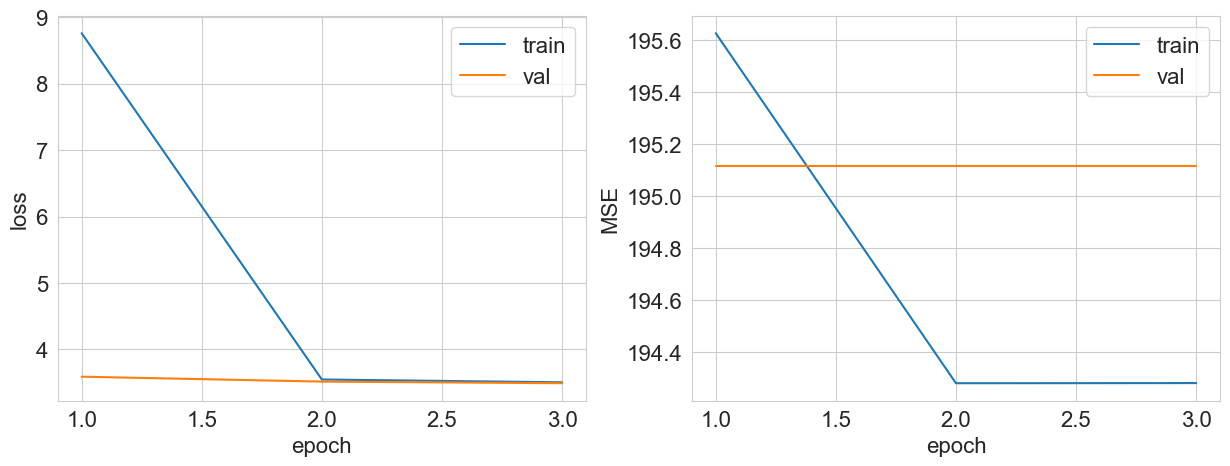

Validation MSE: 195.116


(194.28116020022009, 195.11572334854648)

In [11]:
train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, 3, verbose=True)

**Задание 1.3 (0.5 балла).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

> ## Вывод
> #### Судя по графику модель не учится: уже на второй эпохе значение функции потерь не меняется. Также на валидационной выборке можно увидеть, что по ходу "обучения модели" ничего не меняется. Касаемо значений функции потерь, то тут нейронная сеть значительно проигрывает даже константному предсказанию. Все из-за того, что мы решаем задачу классификации при большом количестве классов, что кажется не очень разумно и сложно для модели

**Задание 1.4 (0.75 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на MSE.

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в DataLoader, сделайте reshape в (-1, 1).
- Не забудьте изменить lambda-выражение, которые вы передаете в `train_and_validate`.
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

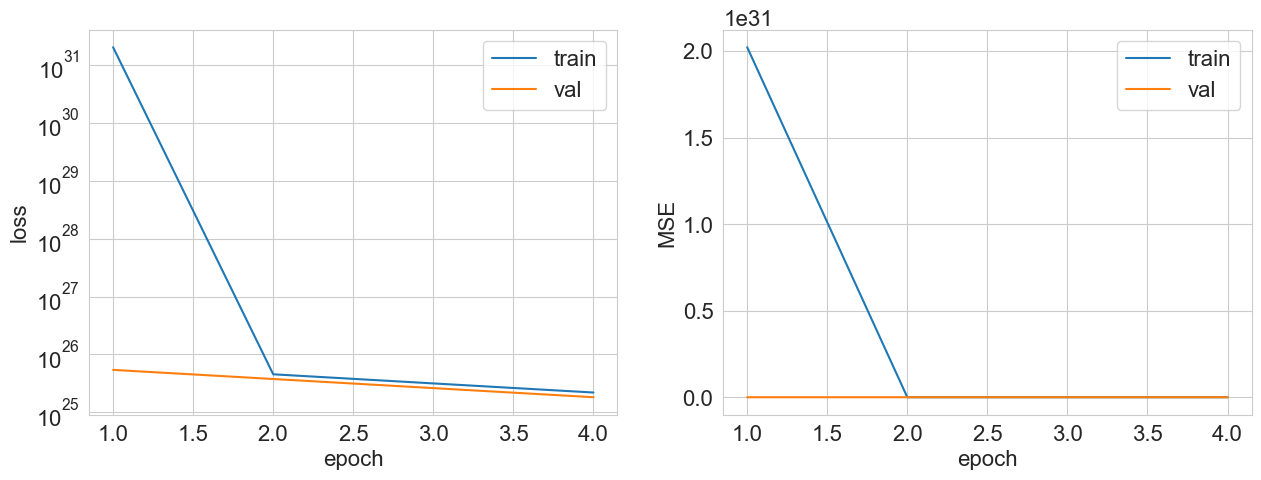

Validation MSE: 18274813329949110648700928.000


(2.2025368031093557e+25, 1.827481332994911e+25)

In [26]:
model = mm.Sequential(
    mm.Linear(X_train.shape[1], 128),
    mm.ReLU(),
    mm.Linear(128, 1)
)

optimizer = mm.SGD(model, lr=1e-5)

train_loader = mm.DataLoader(X_train, y_train.reshape(-1, 1), batch_size=32, shuffle=True)
val_loader = mm.DataLoader(X_val, y_val.reshape(-1, 1), batch_size=32, shuffle=False)

criterion = mm.MSELoss()

metric = lambda pred, y: mean_squared_error(pred, y)

train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, 3, verbose=True)

**Задание 1.5 (0.5 балла).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

> ## Вывод:
>
> Изменение подхода в задаче только ухудшило ситуацию. Да, на левом графике видно, что хотя бы значение лосса начинает меняться, но он стал принимать огромные значения. Потенциально это может быть связано с уменьшением `lr`. В целом это логично, что получились результаты похуже, поскольку целевая переменная все-таки дискретная и обучение на эту целевую переменную как на непрерывную плохая идея.

**Задание 1.6 (0.75 балла).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [27]:
y_max, y_min = y_train.max(), y_train.min()

def normalize(sample):
    """
    Min-max normalization to convert sample to [0, 1] range
    """
    
    return (sample - y_min) / (y_max - y_min)

def denormalize(sample):
    """
    Denormalize sample from [0, 1] to initial range
    """
    
    return sample * (y_max - y_min) + y_min

Теперь повторите эксперимент из **задания 1.4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим сигмоидную активацию после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений. 

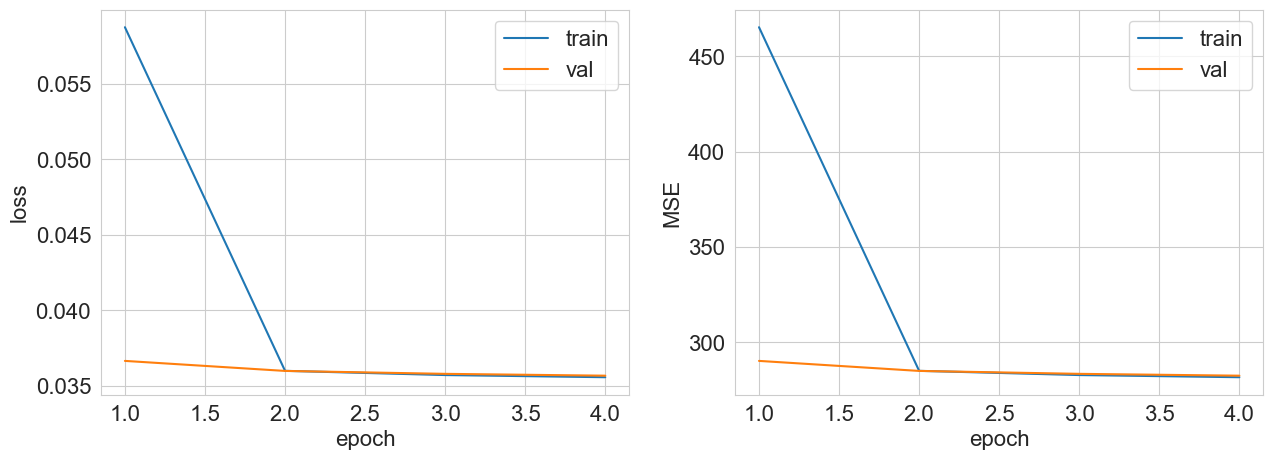

Validation MSE: 282.592


(281.786313080082, 282.592132315645)

In [40]:
model = mm.Sequential(
    mm.Linear(X_train.shape[1], 128),
    mm.ReLU(),
    mm.Linear(128, 1),
    mm.Sigmoid()
)

optimizer = mm.SGD(model, lr=1e-5)

t_train_norm, t_val_norm = normalize(y_train), normalize(y_val)

train_loader = mm.DataLoader(X_train, t_train_norm.reshape(-1, 1), batch_size=32, shuffle=True)
val_loader = mm.DataLoader(X_val, t_val_norm.reshape(-1, 1), batch_size=32, shuffle=False)

criterion = mm.MSELoss()

metric = lambda pred, y: mean_squared_error(denormalize(pred), denormalize(y))

train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, 3, verbose=True)

In [261]:
print(f'Y train: {y_train.var():.2f}')
print(f'Y train Normalized: {t_train_norm.var():.2f}')

Y train: 119.87
Y train Normalized: 0.02


**Задание 1.7 (0.5 балла).** Сравните результаты этого эксперимента с предыдущим запуском. 

> ## Вывод
>
> #### Нормирование целевой перменной действительно помогло и теперь значения ошибок стали выглядеть более адекватно. Это может быть связано с тем, что дисперсия признака после преобразования значительно меньше и модели теперь гораздо легче "предсказывать" эти значения, в отличие от предыдущего случая с высокой дисперсией целевой перменной 

**Задание 1.8 (0.75 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

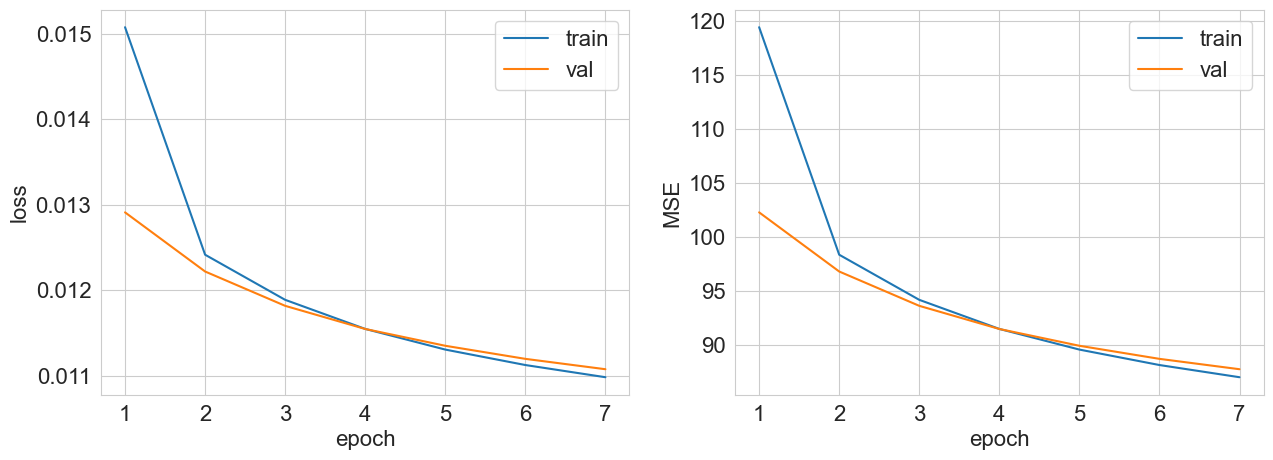

Validation MSE: 87.718


(86.97704357217566, 87.71806155520095)

In [62]:
from sklearn.preprocessing import StandardScaler

model = mm.Sequential(
    mm.Linear(X_train.shape[1], 128),
    mm.ReLU(),
    mm.Linear(128, 1),
    mm.Sigmoid()
)

optimizer = mm.SGD(model, lr=1e-2)

scaler = StandardScaler()

t_train_norm, t_val_norm = normalize(y_train), normalize(y_val)
X_train_scaled, X_val_scaled = scaler.fit_transform(X_train), scaler.transform(X_val)

train_loader = mm.DataLoader(X_train_scaled, t_train_norm.reshape(-1, 1), batch_size=32, shuffle=True)
val_loader = mm.DataLoader(X_val_scaled, t_val_norm.reshape(-1, 1), batch_size=32, shuffle=False)

criterion = mm.MSELoss()

metric = lambda pred, y: mean_squared_error(denormalize(pred), denormalize(y))

train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, 7, verbose=True)

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть 2. Улучшаем нейронную сеть

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества. В заданиях 2.1-2.3 **запускайте эксперименты несколько раз (4-5)** с одинаковыми значениями гиперпараметров обучения, но с разными случайными инициализациями сети (достаточно просто прогнать код с инициализацией модели и ее обучением в цикле: каждый вызов конструктора инициализирует модель случайно). Для сравнения качества разных экспериментов **отрисовывайте ящики с усами (boxplot)** по этим нескольким запускам.

Задание 2.4 требует перебора гиперпараметров, в нем запускайте эксперимент по одному разу для каждого рассмотренного значения, чтобы сэкономить время.

**Задание 2.1 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

In [190]:
import seaborn as sns

names = []

def plt_boxplot(loss_train, mse_train, loss_val, mse_val, label, ax, position):

    names.append(label)
    
    ax[0][0].boxplot(loss_val, positions=[position]), ax[0][0].set_title('Loss on Val sample', fontsize = 10)
    ax[0][1].boxplot(mse_val, positions=[position]), ax[0][1].set_title('MSE on Val sample', fontsize = 10)

    ax[1][0].boxplot(loss_train, positions=[position]), ax[1][0].set_title('Loss on Train sample', fontsize = 10)
    ax[1][1].boxplot(mse_train, positions=[position]), ax[1][1].set_title('MSE on Train sample', fontsize = 10)

    ax[0][0].set_ylabel('loss'), ax[0][1].set_ylabel('MSE'), ax[1][0].set_ylabel('loss'), ax[1][1].set_ylabel('MSE')
    ax[0][0].set_xticklabels(names, rotation = 15), ax[0][1].set_xticklabels(names, rotation = 15), 
    ax[1][0].set_xticklabels(names, rotation = 15), ax[1][1].set_xticklabels(names, rotation = 15)

    ax[0][0].tick_params(labelsize=8), ax[0][1].tick_params(labelsize=8), ax[1][0].tick_params(labelsize=8), ax[1][1].tick_params(labelsize=8)



def fit_model(model, optimizer, criterion, metric, train_loader, val_loader, epochs, num_repeats, verbose=False):

    train_outp, val_outp = [], []
    train_metrics, val_metrics = [], []

    for _ in range(num_repeats):

        tr, tr_metrics, val, vl_metrics = train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, epochs, verbose = False, add_metrics = True)

        train_outp.append(tr)
        val_outp.append(val)
        train_metrics.append(tr_metrics)
        val_metrics.append(vl_metrics)

    return train_outp, train_metrics, val_outp, val_metrics


    # return train_losses[-1], train_metrics[-1], val_losses[-1], val_metrics[-1]



In [191]:
model = mm.Sequential(
    mm.Linear(X_train.shape[1], 128),
    mm.ReLU(),
    mm.Linear(128, 1),
    mm.Sigmoid()
)

scaler = StandardScaler()

t_train_norm, t_val_norm = normalize(y_train), normalize(y_val)
X_train_scaled, X_val_scaled = scaler.fit_transform(X_train), scaler.transform(X_val)

train_loader = mm.DataLoader(X_train_scaled, t_train_norm.reshape(-1, 1), batch_size=32, shuffle=True)
val_loader = mm.DataLoader(X_val_scaled, t_val_norm.reshape(-1, 1), batch_size=32, shuffle=False)

criterion = mm.MSELoss()

metric = lambda pred, y: mean_squared_error(denormalize(pred), denormalize(y))

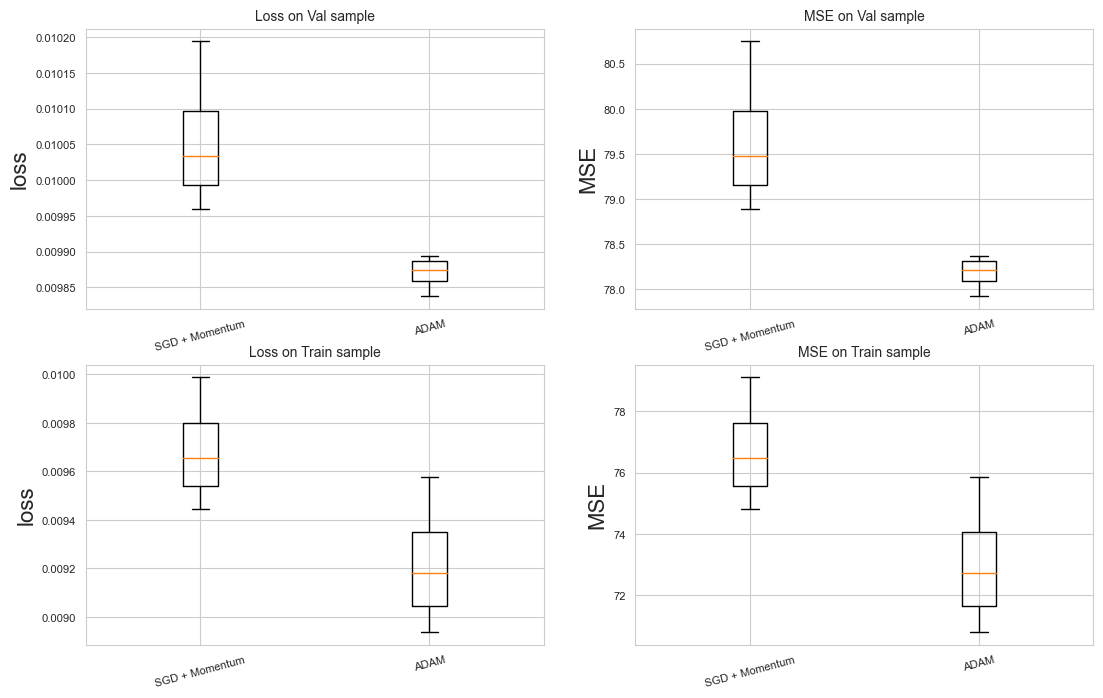

In [192]:
fig, ax = plt.subplots(2, 2, figsize=(13, 8))

optimizer1 = mm.SGD(model, lr=1e-2, momentum = 0.9)
optimizer2 = mm.Adam(model, lr=1e-3)

plt_boxplot(*fit_model(model, optimizer1, criterion, metric, train_loader, val_loader, 5, 4, verbose=False), 'SGD + Momentum', ax, 1)
plt_boxplot(*fit_model(model, optimizer2, criterion, metric, train_loader, val_loader, 5, 4, verbose=False), 'ADAM', ax, 2)

> ## Вывод:
>
> #### На графиках видно, что во всех экспериментах оптимизатор `Adam` показал лучше результат и позволил добиться меньшего значения метрики и лосса, поэтому в дальнейших экспериментах будем использовать его

**Задание 2.2 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках.

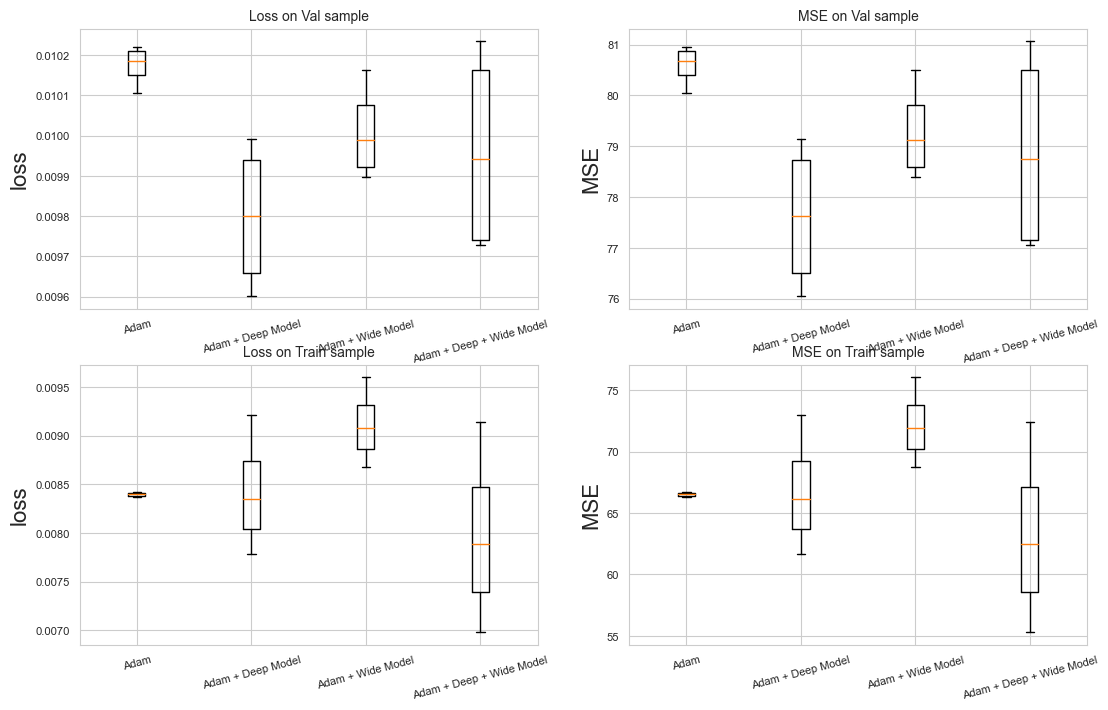

In [196]:
fig, ax = plt.subplots(2, 2, figsize=(13, 8))

names = []

model_deep = mm.Sequential(
    mm.Linear(X_train.shape[1], 128),
    mm.ReLU(),
    mm.Linear(128, 128),
    mm.ReLU(),
    mm.Linear(128, 1),
    mm.Sigmoid()
)

optimizer_deep = mm.Adam(model_deep, lr=1e-3)


model_wide = mm.Sequential(
    mm.Linear(X_train.shape[1], 256),
    mm.ReLU(),
    mm.Linear(256, 1),
    mm.Sigmoid()
)

optimizer_wide = mm.Adam(model_wide, lr=1e-3)


model_comb = mm.Sequential(
    mm.Linear(X_train.shape[1], 256),
    mm.ReLU(),
    mm.Linear(256, 256),
    mm.ReLU(),
    mm.Linear(256, 1),
    mm.Sigmoid()
)

optimizer_comb = mm.Adam(model_comb, lr=1e-3)


scaler = StandardScaler()

t_train_norm, t_val_norm = normalize(y_train), normalize(y_val)
X_train_scaled, X_val_scaled = scaler.fit_transform(X_train), scaler.transform(X_val)

train_loader = mm.DataLoader(X_train_scaled, t_train_norm.reshape(-1, 1), batch_size=32, shuffle=True)
val_loader = mm.DataLoader(X_val_scaled, t_val_norm.reshape(-1, 1), batch_size=32, shuffle=False)

criterion = mm.MSELoss()

metric = lambda pred, y: mean_squared_error(denormalize(pred), denormalize(y))

plt_boxplot(*fit_model(model, optimizer2, criterion, metric, train_loader, val_loader, 5, 4, verbose=False), 'Adam', ax, 1)
plt_boxplot(*fit_model(model_deep, optimizer_deep, criterion, metric, train_loader, val_loader, 5, 4, verbose=False), 'Adam + Deep Model', ax, 2)
plt_boxplot(*fit_model(model_wide, optimizer_wide, criterion, metric, train_loader, val_loader, 5, 4, verbose=False), 'Adam + Wide Model', ax, 3)
plt_boxplot(*fit_model(model_comb, optimizer_comb, criterion, metric, train_loader, val_loader, 5, 4, verbose=False), 'Adam + Deep + Wide Model', ax, 4)

> ## Вывод:
> #### В целом усложнение структуры нейронной сети позволило добиться лучших результатов. Использование широкой и глубокой сетей позволило добится улучшение в метриках при условии, что на обучающей выборке лучше всего обучилась базовая модель в большинстве экспериментов. Стоит уделить внимание комбинации глубины и широты в структуре модели: она лучше других моделей добивается минимума метрик на обучающей выборке, но на валидационной выборке результаты не такие хорошие. Эта модель переобучилась, поэтому в дальнейшем будем использовать ее и попытаемся улучшить результат за борбы с переобучением

**Задание 2.3 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем разные методы регуляризации, чтобы бороться с переобучением. Проведите два эксперимента:

- Добавьте слой дропаута с параметром $p=0.2$ после каждого линейного слоя, кроме последнего.
- Попробуйте batch-нормализацию вместо дропаута. Строго говоря, batch-нормализация не является методом регуляризации, но никто не запрещает нам экспериментировать с ней.

Опишите результаты экспериментов. 

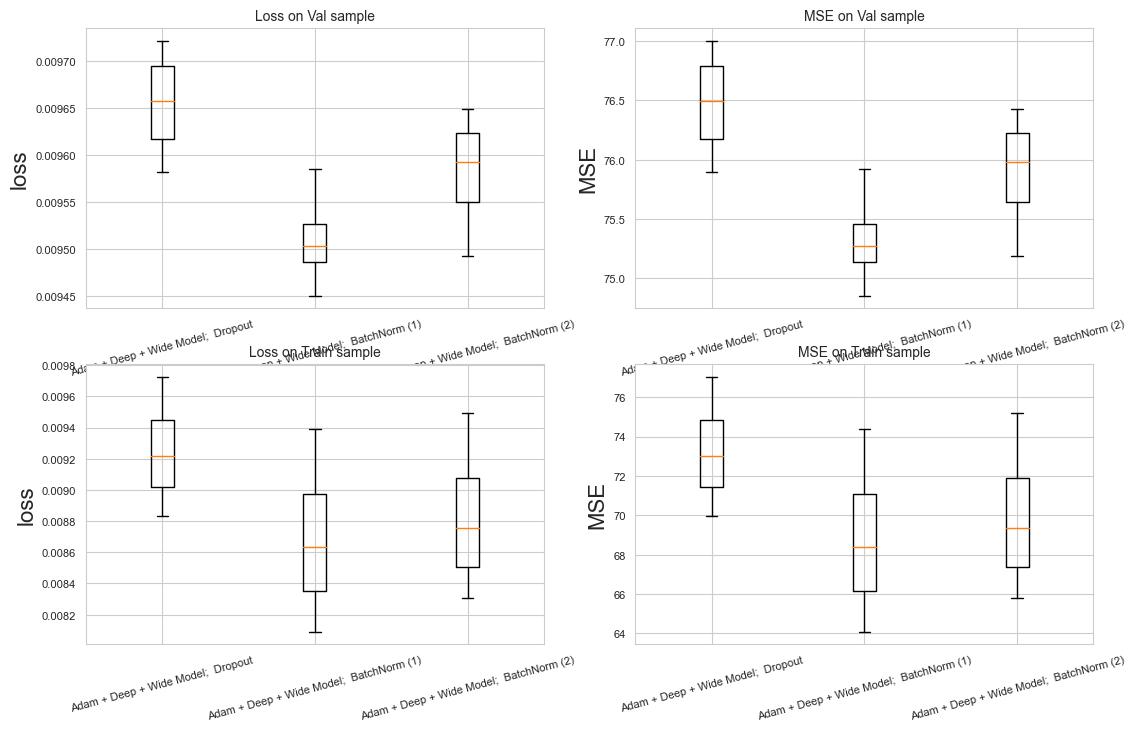

In [268]:
fig, ax = plt.subplots(2, 2, figsize=(13, 8))

names = []

model_dropout = mm.Sequential(
    mm.Linear(X_train.shape[1], 256),
    mm.ReLU(),
    mm.Dropout(0.2),
    mm.Linear(256, 256),
    mm.ReLU(),
    mm.Dropout(0.2),
    mm.Linear(256, 1),
    mm.Sigmoid()
)

optimizer_dropout = mm.Adam(model_dropout, lr=1e-3)


model_batchnorm1 = mm.Sequential(
    mm.Linear(X_train.shape[1], 256),
    mm.BatchNormalization(256),
    mm.ReLU(),
    mm.Linear(256, 256),
    mm.BatchNormalization(256),
    mm.ReLU(),
    mm.Linear(256, 1),
    mm.Sigmoid()
)

optimizer_batchnorm1 = mm.Adam(model_batchnorm1, lr=1e-3)

model_batchnorm2 = mm.Sequential(
    mm.Linear(X_train.shape[1], 256),
    mm.ReLU(),
    mm.BatchNormalization(256),
    mm.Linear(256, 256),
    mm.ReLU(),
    mm.BatchNormalization(256),
    mm.Linear(256, 1),
    mm.Sigmoid()
)

optimizer_batchnorm2 = mm.Adam(model_batchnorm2, lr=1e-3)

scaler = StandardScaler()

t_train_norm, t_val_norm = normalize(y_train), normalize(y_val)
X_train_scaled, X_val_scaled = scaler.fit_transform(X_train), scaler.transform(X_val)

train_loader = mm.DataLoader(X_train_scaled, t_train_norm.reshape(-1, 1), batch_size=32, shuffle=True)
val_loader = mm.DataLoader(X_val_scaled, t_val_norm.reshape(-1, 1), batch_size=32, shuffle=False)

criterion = mm.MSELoss()

metric = lambda pred, y: mean_squared_error(denormalize(pred), denormalize(y))

plt_boxplot(*fit_model(model_dropout, optimizer_dropout, criterion, metric, train_loader, val_loader, 5, 4, verbose=False), 'Adam + Deep + Wide Model;  Dropout', ax, 1)
plt_boxplot(*fit_model(model_batchnorm1, optimizer_batchnorm1, criterion, metric, train_loader, val_loader, 5, 4, verbose=False), 'Adam + Deep + Wide Model;  BatchNorm (1)', ax, 2)
plt_boxplot(*fit_model(model_batchnorm2, optimizer_batchnorm2, criterion, metric, train_loader, val_loader, 5, 4, verbose=False), 'Adam + Deep + Wide Model;  BatchNorm (2)', ax, 3)

> ## Вывод:
> 
> #### Эксперименты показали, что использование `BatchNorm` приводит к лучшим результатам в сравнении с `Dropout`. Также я попробовал использовать разные порядки использования `BatchNorm`:
> $$ \begin{equation} 
     \begin{align}
      Linear \rightarrow BatchNorm \rightarrow ReLU \qquad \\
      Linear \rightarrow ReLU \rightarrow BatchNorm \qquad \end{align} \end{equation}
> $$
> #### Несмотря на то, что на лекции говорилось о "плохой идее" использовать `BatchNorm` до функции активации, структура (2) позволила добиться лучших результатов на тестовой выборке (если судить по результам в последнем задании). Это можно объяснить тем, что появляется дополнительная регуляризация в виде того, что вероятность зануления градиента функции активации при нормированном входе значительно возрастает
> #### Также я заметил, что структура (2) менее зависит от выбора гиперпараметров `LearningRate` и `WeightDecays`: для всех наборов параметров получаются +- адекватные значении метрик (< 100), в то время как при обучении структуры (1) при тех же наборах гиперпараметров могли получаться значение `1e6`

**Задание 2.4 (1.5 балла).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению MSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения), можете воспользоваться `verbose=False` в функции `train_and_validate`. Затем подберите оптимальное значение weight decay для данного lr (тоже по логарифмической сетке, типичные значения этого параметра лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку). Постройте графики зависимости MSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

In [245]:
import time

results = pd.DataFrame()

model = mm.Sequential(
    mm.Linear(X_train.shape[1], 256),
    mm.BatchNormalization(256),
    mm.ReLU(),
    mm.Linear(256, 256),
    mm.BatchNormalization(256),
    mm.ReLU(),
    mm.Linear(256, 1),
    mm.Sigmoid()
)

scaler = StandardScaler()

t_train_norm, t_val_norm = normalize(y_train), normalize(y_val)
X_train_scaled, X_val_scaled = scaler.fit_transform(X_train), scaler.transform(X_val)

train_loader = mm.DataLoader(X_train_scaled, t_train_norm.reshape(-1, 1), batch_size=32, shuffle=True)
val_loader = mm.DataLoader(X_val_scaled, t_val_norm.reshape(-1, 1), batch_size=32, shuffle=False)

criterion = mm.MSELoss()

metric = lambda pred, y: mean_squared_error(denormalize(pred), denormalize(y))

i = 0

for lr_i in [1e-6, 1e-4, 1e-3]:
    for wd_i in [1e-6, 1e-4, 1e-3, 0]:

        start = time.time()

        optimizer_i = mm.Adam(model, lr=lr_i, weight_decay = wd_i)

        tr_score, val_score = train_and_validate(model, optimizer_i, criterion, metric, train_loader, val_loader, 5, verbose=False)

        perm_df = pd.DataFrame({'lr': [lr_i], 'weight_decay': [wd_i], 'trainMSE': [tr_score], 'valScore': [val_score]})

        results = pd.concat([results, perm_df])

        i += 1

        print(f'{i}/12 DONE, took {(time.time() - start)/ 60:.2f} min')


1/12 DONE, took 2.54 min
2/12 DONE, took 2.36 min
3/12 DONE, took 2.54 min
4/12 DONE, took 2.60 min
5/12 DONE, took 2.50 min
6/12 DONE, took 2.59 min
7/12 DONE, took 2.59 min
8/12 DONE, took 2.40 min
9/12 DONE, took 2.40 min
10/12 DONE, took 2.47 min
11/12 DONE, took 2.51 min
12/12 DONE, took 2.65 min


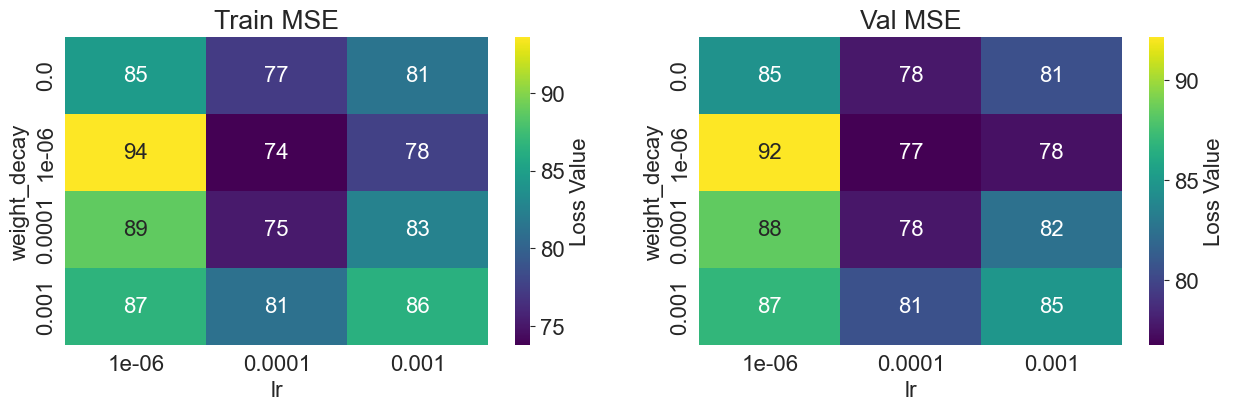

In [246]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

sns.heatmap(results.pivot_table(index='weight_decay', columns='lr', values='trainMSE'), annot=True, cmap='viridis', cbar_kws={'label': 'Loss Value'}, ax = ax[0])
sns.heatmap(results.pivot_table(index='weight_decay', columns='lr', values='valScore'), annot=True, cmap='viridis', cbar_kws={'label': 'Loss Value'}, ax = ax[1])

ax[0].set_title('Train MSE')
ax[1].set_title('Val MSE');

Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.

**Задание 2.5 (0.5 балла).** Мы провели большое число экспериментов и подобрали оптимальную архитектуру и гиперпараметры. Пришло время обучить модель на полной обучающей выборке, померять качество на тестовой выборке и сравнить с бейзлайнами. Проделайте это. 

In [266]:
X_train_full = X[:train_size, :]
y_train_full = y[:train_size]
X_test_full = X[train_size:, :]
y_test_full = y[train_size:]

model = mm.Sequential(
    mm.Linear(X_train.shape[1], 256),
    mm.BatchNormalization(256),
    mm.ReLU(),
    mm.Linear(256, 256),
    mm.BatchNormalization(256),
    mm.ReLU(),
    mm.Linear(256, 1),
    mm.Sigmoid()
)

optimizer = mm.Adam(model, lr=1e-4, weight_decay = 1e-6)

scaler = StandardScaler()

t_train_norm, t_test_norm = normalize(y_train_full), normalize(y_test_full)
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train_full), scaler.transform(X_test_full)

train_loader = mm.DataLoader(X_train_scaled, t_train_norm.reshape(-1, 1), batch_size=32, shuffle=True)
test_loader = mm.DataLoader(X_test_scaled, t_test_norm.reshape(-1, 1), batch_size=32, shuffle=False)

criterion = mm.MSELoss()

metric = lambda pred, y: mean_squared_error(denormalize(pred), denormalize(y))

tr_score, test_score = train_and_validate(model, optimizer, criterion, metric, train_loader, test_loader, 5, verbose=False)

In [267]:
print(f'Neural Network Test Score: {test_score:.2f}')
print(f'Ridge Regression Test Score: {mean_squared_error(y_test, rr.predict(X_test)):.2f}')
print(f'Best constant Test Score: {mean_squared_error(y_test, np.full(y_test.shape, y_test.mean())):.2f}')

Neural Network Test Score: 76.87
Ridge Regression Test Score: 89.75
Best constant Test Score: 117.62
